# Implementation of MCP Neuron for AND and OR Function.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  state_neuron = []
  for i in range(len(X1)):
      if X1[i] == 1 and X2[i] == 1:
          state_neuron.append(1)
      else:
          state_neuron.append(0)

  return state_neuron

In [3]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [4]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
    state_neuron = []
    for i in range(len(X1)):
        if X1[i] == 1 or X2[i] == 1:
            state_neuron.append(1)

    return state_neuron


In [5]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [1, 1, 1]


### 3.2.1 Answer the Following Question:

Question - 1: List out all the limitations of MCP - Neurons.

Answer:
1. Cannot solve XOR: Only works for linearly separable problems.
2. Fixed threshold: No learning values are manually set.
3. No weighted inputes: Treats all inputs equally.
4. No adaptability: Cannot adjust to new data.

Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

Answer:
XOR cannot be implemented using NAND, OR and AND gates:

Logic:
1. NAND = NOT(AND(X1,X2))
2. OR = X1 OR X2
3. XOR = AND(NAND, OR)

# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/Ai&Machine/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


Answer the Following Question:
1. Question - 1: What does the shape of X represent?

Answer:
The shape (12665,784) means that X has 12,665 samples (rows) and 784 features (colimns). Each row represents a data point, and each column represents a feature.

2. Question - 2: What does the shape of X represent?

Answer:
The shape (12,665) means that y is a label vector with 12,665 labels. Each entry corresponds to the class label for the respective row in X.

### Viewing the Dataset.

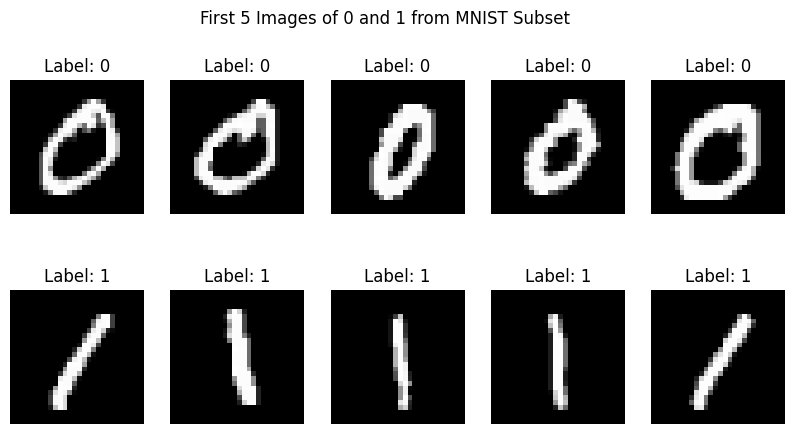

In [7]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [8]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

Answer the Following Question:

Question - 3: What does the weights array represent in this context?

Answer:
The weights array represents the importance of each pixel in predicting the output. It helps the model learn which pixels contribute more to classification.

Question - 4: Why are we initializing the weights to zero? What effect could this
have on the training process?

Answer:
Weights are set to zero for simplicity, but this can cause all neurons to update identically, leading to symmetry and preventing proper learning.

## Step - 3 - Make a Decision function:

In [9]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############  # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [10]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    for epoch in range(epochs):
        for i in range(len(X)):
            output = np.dot(X[i], weights) + bias
            y_pred = 1 if output >= 0 else 0

            # Update weights and bias if prediction is wrong
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)

    # Calculate final accuracy
    predictions = decision_function(X, weights, bias)
    accuracy = np.mean(predictions == y)
    if epoch % 10 == 0:  # Print every 10 epochs
      print(f"Epoch {epoch}: Accuracy = {accuracy:.2f}")


    return weights, bias, accuracy

## Training the Perceptron

In [11]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  1.0


Answer the Following Question: (short and simple)
Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?

Answer:
The purpose of the output = np.dot(X[i], weights) is to calculate the weighted sum of inputs and add the bias to comupute the output of a neuron.

Question - 6: What happens when the prediction is wrong? How are the weights and bias updated?

Answer:
When the prediction is wrong, the weights and bias are updated by adding the error scaled by the learning rate. The weights are adjusted based on the error and the input data, and the bias is updated similarly.

Question - 7: Why is the final accuracy important, and what do you expect it to be?

Answer:
The final accuracy is important because it measures how well the model performs in making correct predictions. You expect it to be as high as possible, ideally close to 100%, depending on the complexity of the data and the model.

## Step 5: Visualize Misclassified Images

In [12]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


Answer the Following Question:

Question - 8:What does misclassified idx store, and how is it used in this code?

Answer:
misclassified_idx stores the indices of the samples that were incorrectly classified by the model. It is used to identify which specific data points (or images) were misclassified, so they can be examined or used for further analysis.

Question - 9: How do you interpret the result if the output is ”All images were
correctly classified!”?

Answer:

If the output is "All images were correctly classified!", it means the model has made perfect predictions on all test samples, achieving 100% accuracy.

# **Task 3: Perceptron Algorithm for 3 vs 5 Classification.**

## **Load the Dataset**

In [13]:
# Load dataset
df_3_5 = pd.read_csv('/content/drive/MyDrive/Ai&Machine/mnist_3_and_5.csv')

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # 784 pixel features
y = df_3_5["label"].values  # Labels: 3 (mapped to 0) and 5 (mapped to 1)

# Convert labels to binary (e.g., 3 → 0 and 5 → 1)
y = np.where(y == 3, 0, 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


## **Step - 1 Viewing the Dataset.**

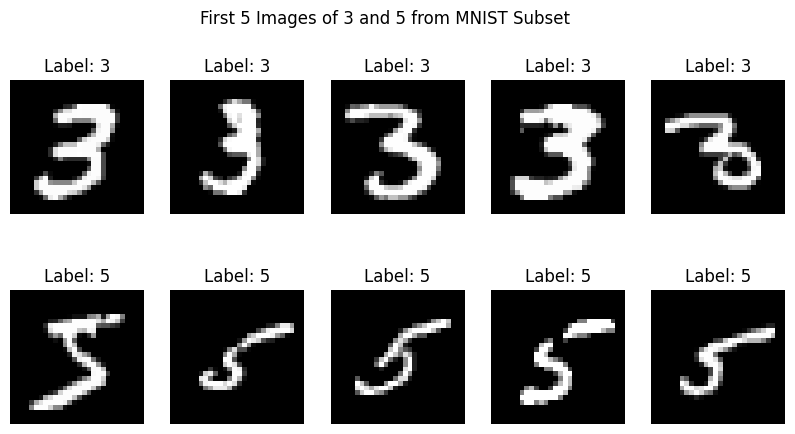

In [14]:
# Separate images for label 3 and label 5
images_3 = X[y == 0]  # Get all images with label 3
images_5 = X[y == 1]  # Get all images with label 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_2 or images_3 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 3
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 5
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()


## **Step - 2 - Initializing the Weights:**

In [15]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## **Step - 3 - Make a Decision function:**

In [16]:
import numpy as np

def decision_function(X, weights, bias):
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 1, 0)  # Step function

## **Step - 3 - Implement the Perceptron Learning Algorithm**

In [17]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    for epoch in range(epochs):
        for i in range(len(X)):
            output = np.dot(X[i], weights) + bias
            y_pred = 1 if output >= 0 else 0

            # Update weights and bias if prediction is wrong
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)

    # Calculate final accuracy
    predictions = decision_function(X, weights, bias)
    accuracy = np.mean(predictions == y)

    return weights, bias, accuracy

## **Training the Perceptron**

In [18]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  0.986866107260124


## **Step 5: Visualize Misclassified Images**

Final Accuracy: 0.9869


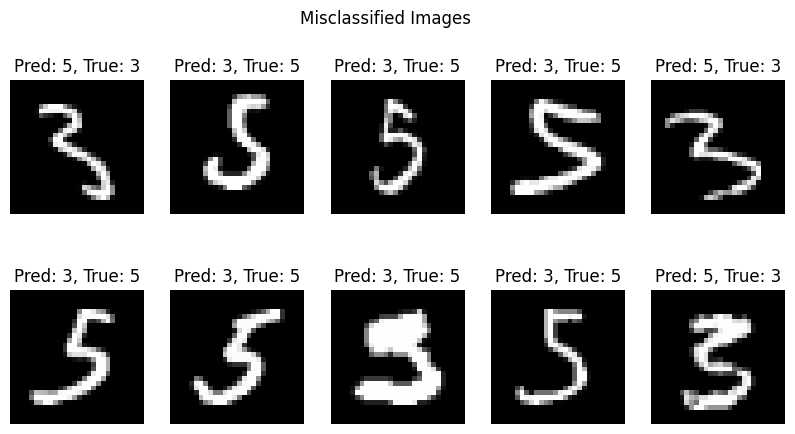

In [19]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        # Map binary labels back to 3 and 5 for display
        pred_label = 5 if y_pred[idx] == 1 else 3
        true_label = 5 if y[idx] == 1 else 3
        ax.set_title(f"Pred: {pred_label}, True: {true_label}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")